In [90]:
#importancion de librerias para el tratamineto de datos
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
import warnings

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

¿Qué método de pandas utilizarías para cargar la información en un dataframe?

debido a que el archivo es un CSV, el metodo seleccionado para la carga del archovo sera .read_csv('ruta_del_archivo')

- ¿Qué alternativa a pandas podrías utilizar?



In [22]:
#generacion del dataframe
df = pd.read_csv('C:/Users/RENATO SANCHEZ/Desktop/bipi/customers.csv')
df.head(5)
#mostrar los 5 primeros registros del dataframe

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [168]:
#debido a un analisis posterior decidi , colocar una nueva columna que agrupa las edades 

def agrupacino (x):
    if(x>=0 and x<=10):
        return "[0-10]"
    elif(x>=11 and x<=20):
        return "[11-20]"
    elif(x>=21 and x<=30):
        return "[21-30]"
    elif(x>=31 and x<=40):
        return "[31-40]"
    elif(x>=41 and x<=50):
        return "[41-50]"
    elif(x>=51 and x<=60):
        return "[51-60]"
    elif(x>=61 and x<=70):
        return "[61-70]"
    elif(x>=71 and x<=80):
        return "[71-80]"
    elif(x>=81 and x<=90):
        return "[81-90]"
    elif(x>=91 and x<=99):
        return "[91-99]"
    
df['Agrupacion Edad'] = df['Age'].apply(agrupacino)

realizaremos una breve exploracion de los datos del dataframe

In [23]:
#estadisitocs de las variables cuantitativas
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [24]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

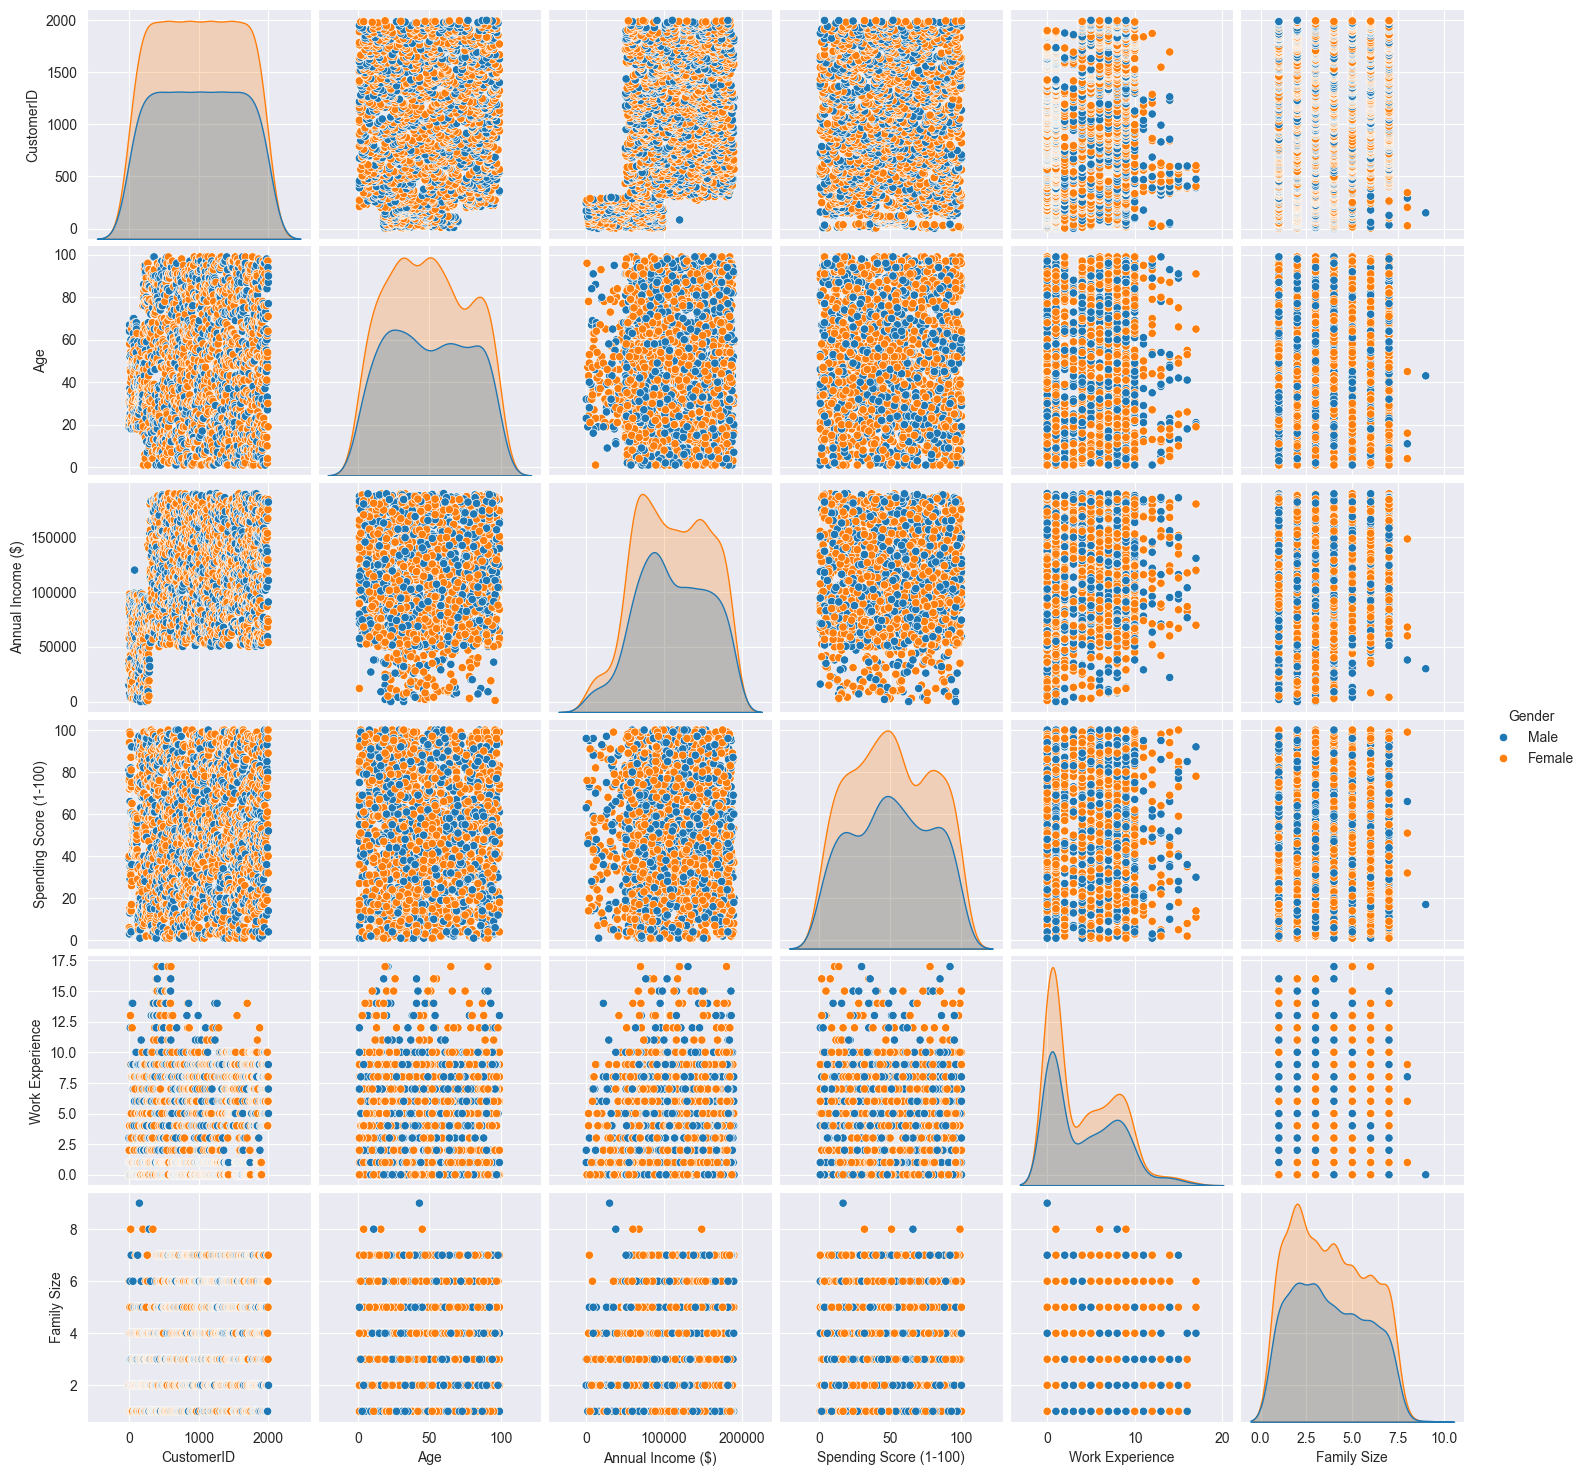

In [103]:
sns.pairplot(data=df,hue='Gender')

In [ ]:
#de la visualizacion no podemos obtener demasiada informacion de primera mano

OBSERVACIONES - DE LA EXPLORACION

In [25]:
#observamos que tenemos 2000 registors en el csv, ademas que la columna Porfession cuenta con campos vacios

#ademas la edad minima en ciertos casos es 0, lo cual se puede interpretar como un erorr en digitacion de informacion

#la columna score (1-100) entendemos que los vsalors flucutan en ese rango, por lo que e valor 0 no esta permitido
#consideraremos cambiarlo por la media en este caso para q no afecte las medidas que se pueden ejecutar

#las familias pueden estar formaas por  1 miembre

#ademas que el promedio anual de ingresos si puede ser 0, consideraremos esto 

In [26]:
edad_promedio = df['Age'].mean()

In [27]:
#resolveremos los errores de tipeo en la edad, remplazandolos por la media de las edades de los customers
#ademas las profesiones nulas las ponremos como campo Otros. dando a entender que los customers no encontraron su profesion
#por lo que no llenaron el campo

In [28]:
#lo que aremos es remplazar los 0 de edad, por NAN y posteriormente remplazar los NAN por el promedio de los valores
df['Age'] = df['Age'].replace(0,np.NAN)
df['Age'] = df['Age'].fillna(edad_promedio)

In [31]:
#remplazaremos los NAN de profesion por Otros

df['Profession'] = df['Profession'].fillna('Others')

In [37]:
#lo que aremos es remplazar los 0 de score por NAN y posteriormente remplazar los NAN por el promedio de los valores
score_mean=df['Spending Score (1-100)'].mean()
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].replace(0,np.NAN)
df['Spending Score (1-100)'] = df['Spending Score (1-100)'].fillna(score_mean)

In [38]:
df.info()
#obseramos que ya no existen campos con valores nulos en el dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              2000 non-null   int64  
 1   Gender                  2000 non-null   object 
 2   Age                     2000 non-null   float64
 3   Annual Income ($)       2000 non-null   int64  
 4   Spending Score (1-100)  2000 non-null   float64
 5   Profession              2000 non-null   object 
 6   Work Experience         2000 non-null   int64  
 7   Family Size             2000 non-null   int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 125.1+ KB


In [39]:
df.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,49.547520,110731.821500,51.013463,4.102500,3.768500
std,577.494589,27.912825,45739.536688,27.888065,3.922204,1.970749
min,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,500.750000,26.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.960000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [ ]:
#commo observamos con esta pequeña exploracion , tenemos los datos con mas sentido 
#no poseemos nulos
#la edada aunqe tomo un valor decimal, esto es debido a que el dato fue un error y se remplazo por la media para q no altere el calclo de 
#valores

#el ingreso anual se considera como 0 en ciertos casos - esto pasa en la realidad 

#el spending score 0 se remplazo por el promedio ya que el ranking no admite 0

# y las familias pueden estar integradas por un mmiemnbro 

1. Calcular el número y porcentaje sobre el total absoluto de Mujeres monoparentales que han gastado más de 15.000 dólares.

In [69]:
# CONDICION   dataframe que filtra las mujeres con gasto mayor a  15000 ademas que sean monoparentales
mujeres_1_15000=df[(df['Gender']=='Female') & (df['Annual Income ($)'] > 15000) & (df['Family Size'] ==1) ]

#cantidad de personas que cumplen con los requisitos descritos 
conteo = len(mujeres_1_15000)

#total de personas del data frame
universo = len(df)

#porcentaje de personas que cumplen con la condicion 
percenta  = (conteo/universo)*100

In [73]:
print ('el total de mujeres que cumplen con la condicion descrita son:',conteo)
print('----------------------------------------------------------------------------------------------')
print('el total de personas de la muesrtra es :',universo)
print('----------------------------------------------------------------------------------------------')
print('el porcentaje de mujeres que cumplen con la condicion , con respecto al universo de personas es:',percenta,'%')

el total de mujeres que cumplen con la condicion descrita son: 172
----------------------------------------------------------------------------------------------
el total de personas de la muesrtra es : 2000
----------------------------------------------------------------------------------------------
el porcentaje de mujeres que cumplen con la condicion , con respecto al universo de personas es: 8.6 %


2. Calcular cuántos abogados (M/F) hay en el dataset que tengan mayor experiencia laboral que la media de ingenieros hombres.

In [79]:
#priemro buscaremos la media de experiencia laboral de los ingenieros hombres
media_ingenieros_hobres = df[ (df['Gender']=='Male') & (df['Profession']=='Engineer')]['Work Experience'].mean()

#ahora filtraremos los abogados (M/F) cuya experiencia sea mayor a este promedio calculado

abogados_comparativa = df[(df['Profession']=='Lawyer') & (df['Work Experience']>media_ingenieros_hobres)] 

In [80]:
abogados_comparativa

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
45,46,Female,24.00,3000,65.0,Lawyer,4,2
64,65,Male,63.00,63000,51.0,Lawyer,7,2
213,214,Male,49.00,50000,82.0,Lawyer,8,1
230,231,Female,6.00,93000,53.0,Lawyer,8,2
253,254,Female,86.00,72000,13.0,Lawyer,7,3
255,256,Male,59.00,85000,49.0,Lawyer,4,2
312,313,Female,24.00,118302,100.0,Lawyer,5,1
315,316,Male,72.00,93921,93.0,Lawyer,9,2
321,322,Male,5.00,69078,60.0,Lawyer,13,1
352,353,Female,51.00,72303,98.0,Lawyer,7,1


3. Dibuja la distribución de abogados en función de su gasto anual (utiliza franjas de gasto) y de su sexo.

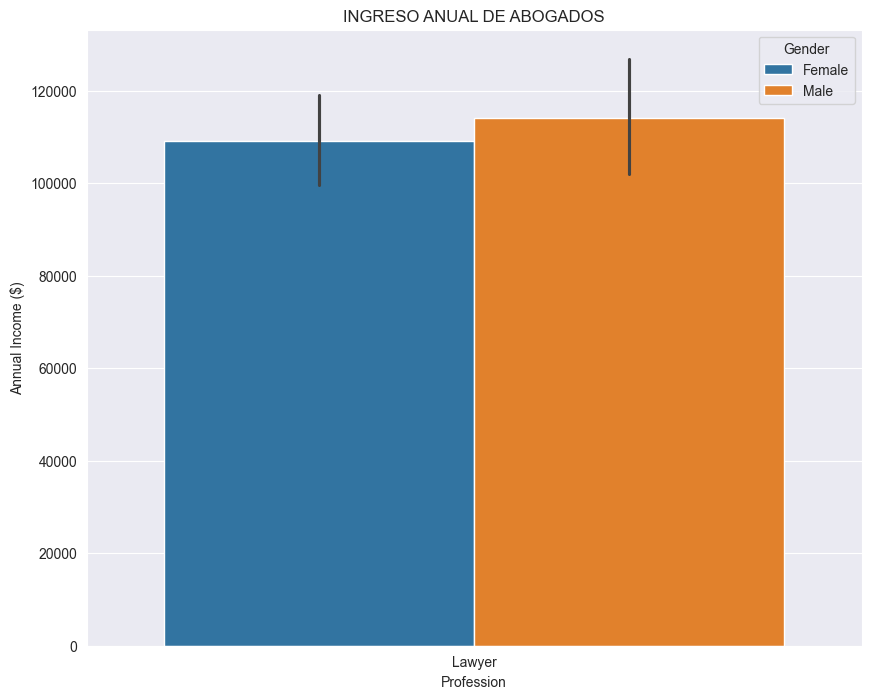

In [94]:
plt.figure(figsize=(10,8))
sns.barplot(data=df[df['Profession']=='Lawyer'],x='Profession',y='Annual Income ($)',hue='Gender')
plt.title('INGRESO ANUAL DE ABOGADOS')
plt.show()

4. Añade algún análisis que creas que puede ser interesante explicando por pantalla el resultado del mismo.

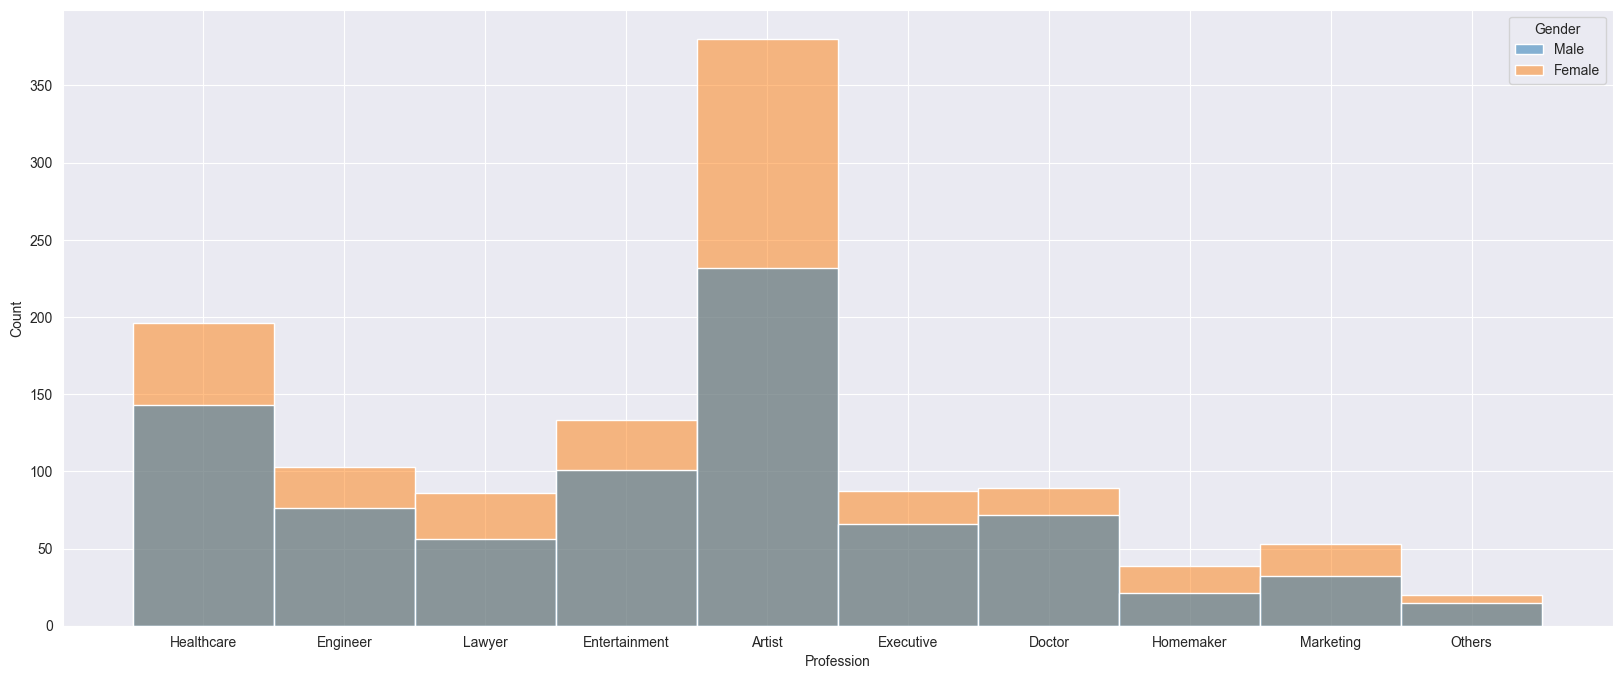

In [115]:
plt.figure(figsize=(20,8))
sns.histplot(data=df,x='Profession',hue='Gender')
plt.show()

#observamos que en todas las professiones el numero de mujeres esta por debajo de hombres, ademas artistas es la carrera con mas poblacion

<Axes: xlabel='Gender', ylabel='Annual Income ($)'>

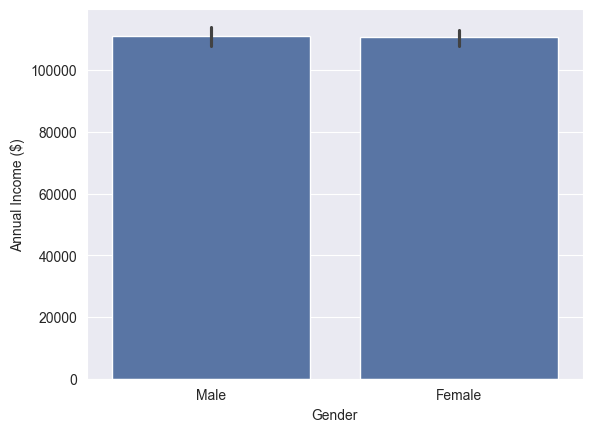

In [145]:
#si obtenemos una grafica con el promedio de los ingresos de hombrs y mujeres veremos:

sns.barplot(data=df,x='Gender',y='Annual Income ($)',estimator='mean') 

#la primera impresion que tenemos es que el ingreso medio de hombres y mujeres es "igual2"

<Axes: ylabel='Annual Income ($)'>

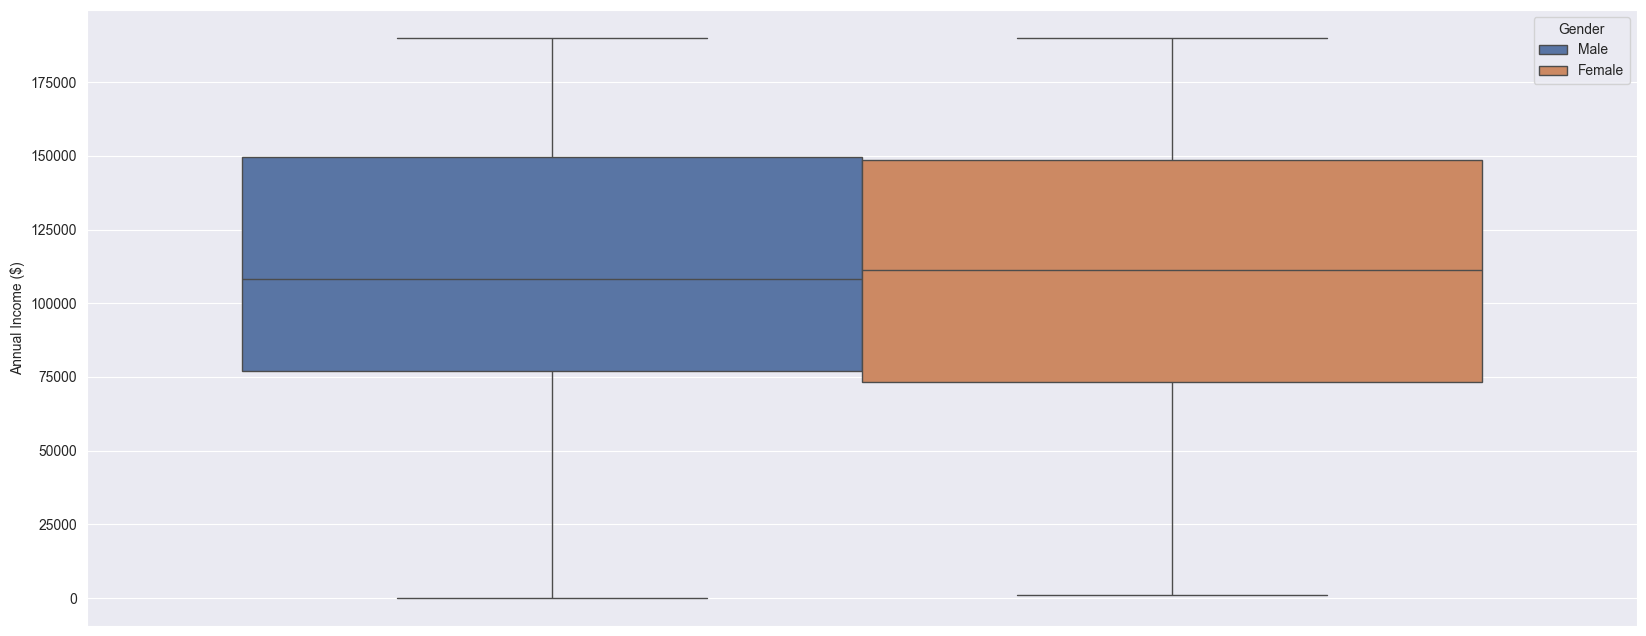

In [149]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df, y='Annual Income ($)',hue='Gender')

In [120]:
salarios_group = df.groupby(['Profession','Gender']).agg(
    Salarios_prmedio = pd.NamedAgg(column='Annual Income ($)',aggfunc=np.mean)
)
salarios_group.reset_index(inplace=True)
salarios_group

,Profession,Gender,Salarios_prmedio
0,Artist,Female,108102.326316
1,Artist,Male,109880.961207
2,Doctor,Female,109463.168539
3,Doctor,Male,114181.472222
4,Engineer,Female,108497.699029
5,Engineer,Male,114771.039474
6,Entertainment,Female,108907.496241
7,Entertainment,Male,112945.356436
8,Executive,Female,118800.781609
9,Executive,Male,107138.818182


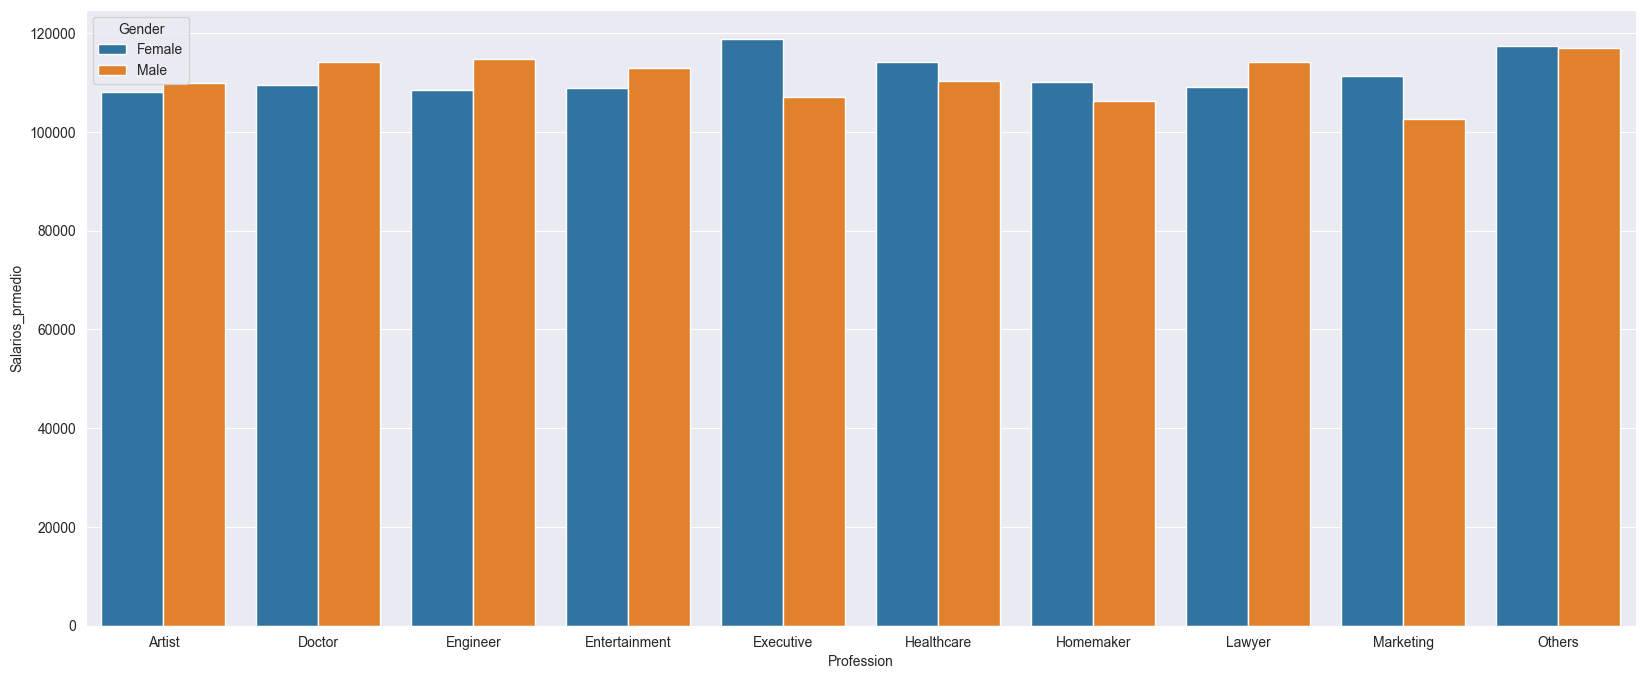

In [122]:
plt.figure(figsize=(20,8))
sns.barplot(data=salarios_group,x='Profession',y='Salarios_prmedio',hue='Gender')
plt.show()

#sin embargo cuando vamos carrera poe carrera vemos como se extienden las difrencias en alguna de ellas- aun siendo no muy pronunciadas

In [123]:
#como observamos en el grafico superior cuando comparamos el salario promedio por genero profesion a profesion no existe una diferrncia
#significativa entre las profesiones escogidas

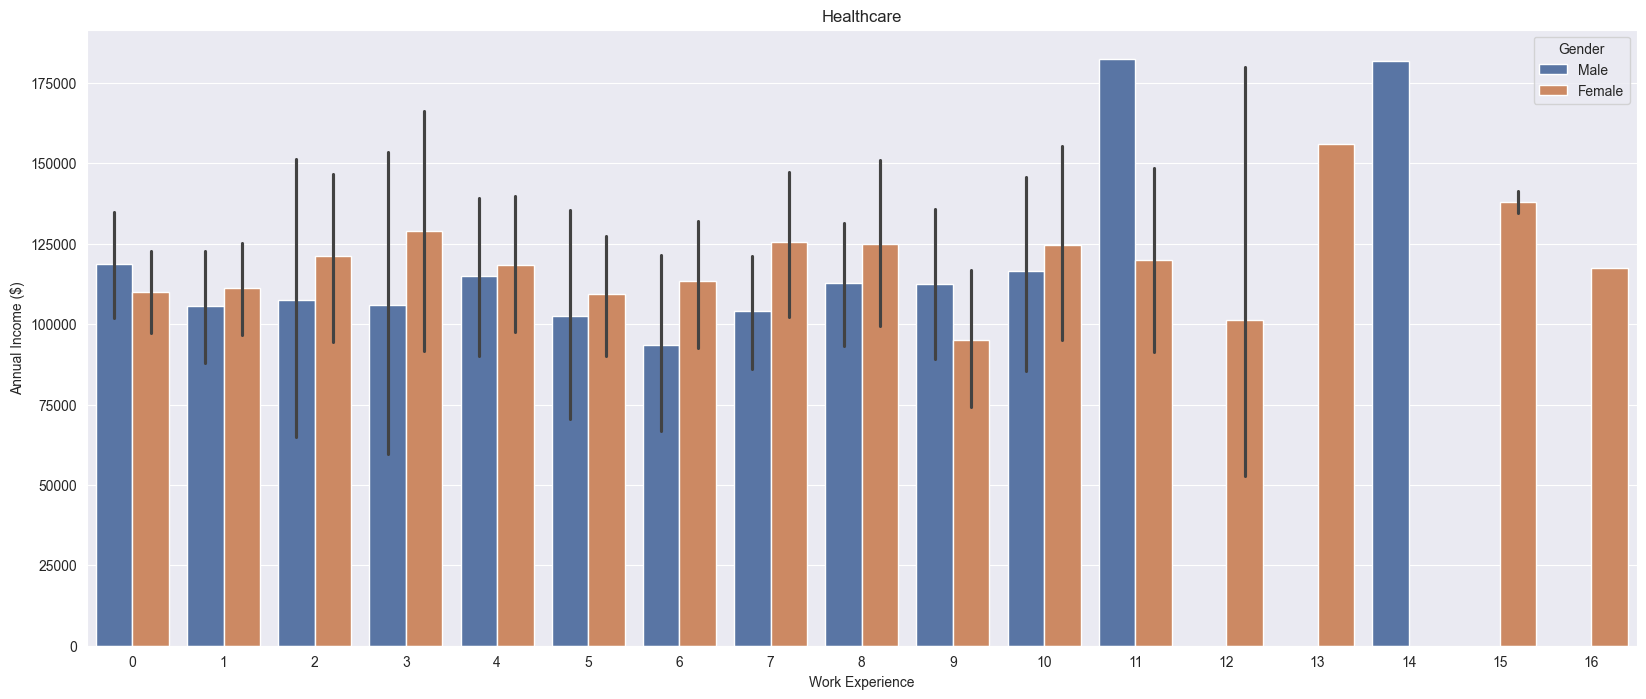

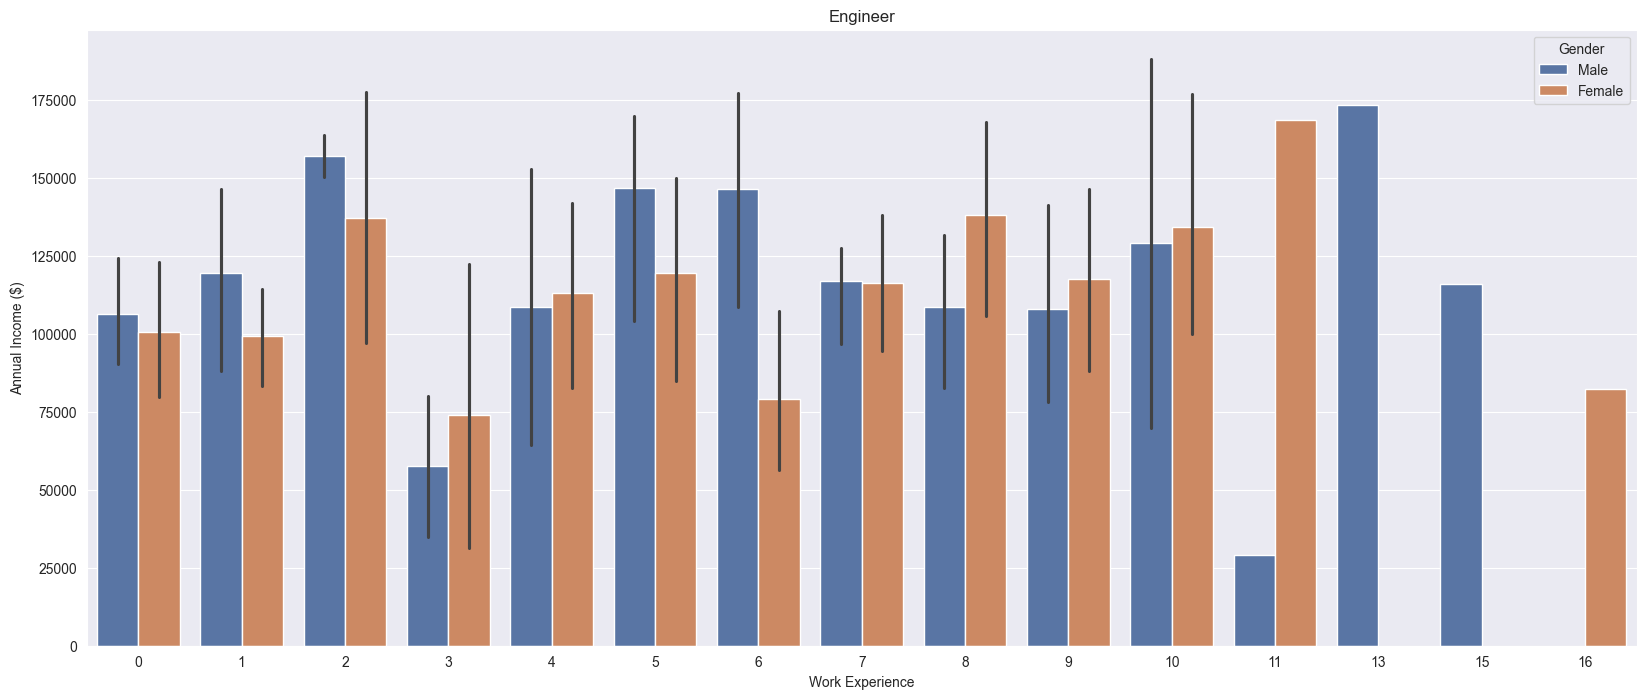

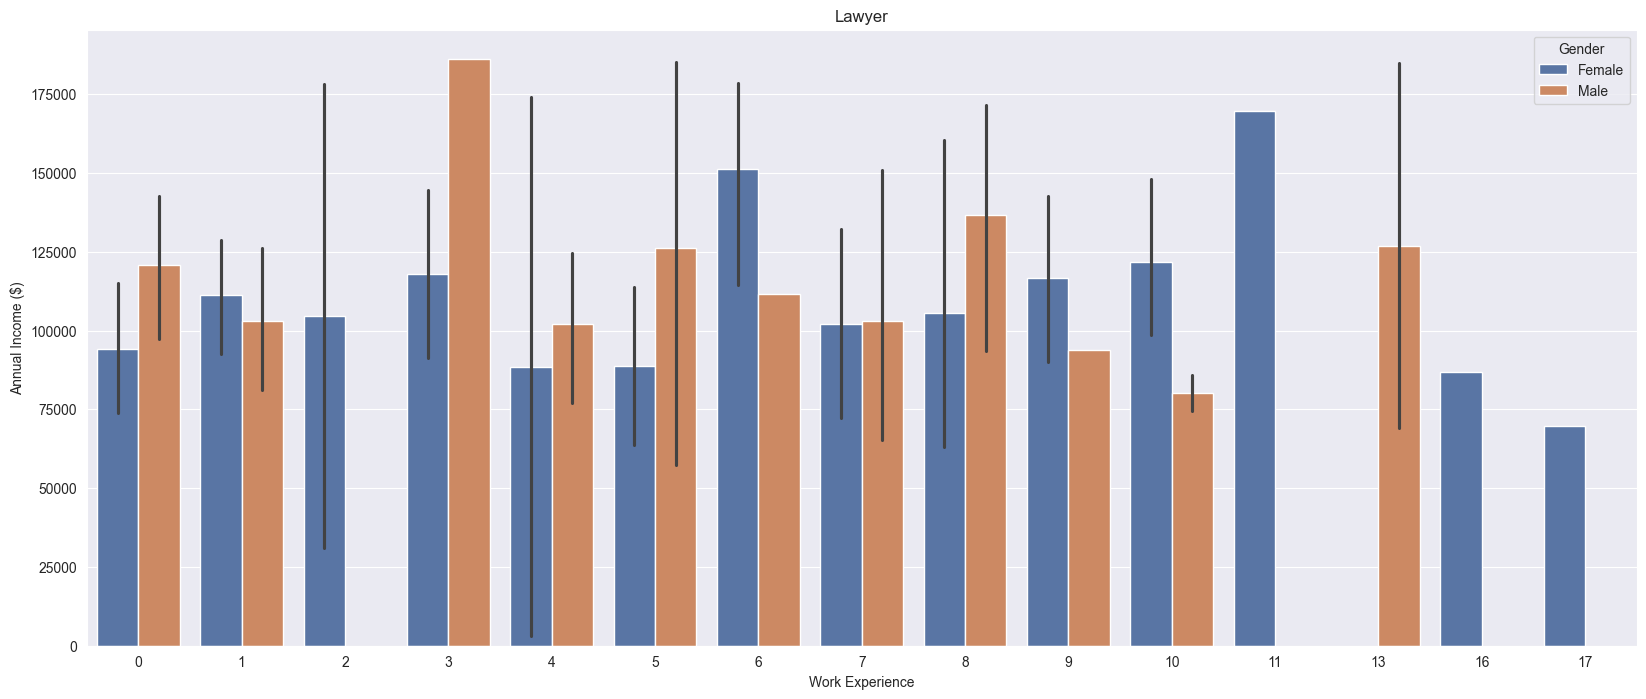

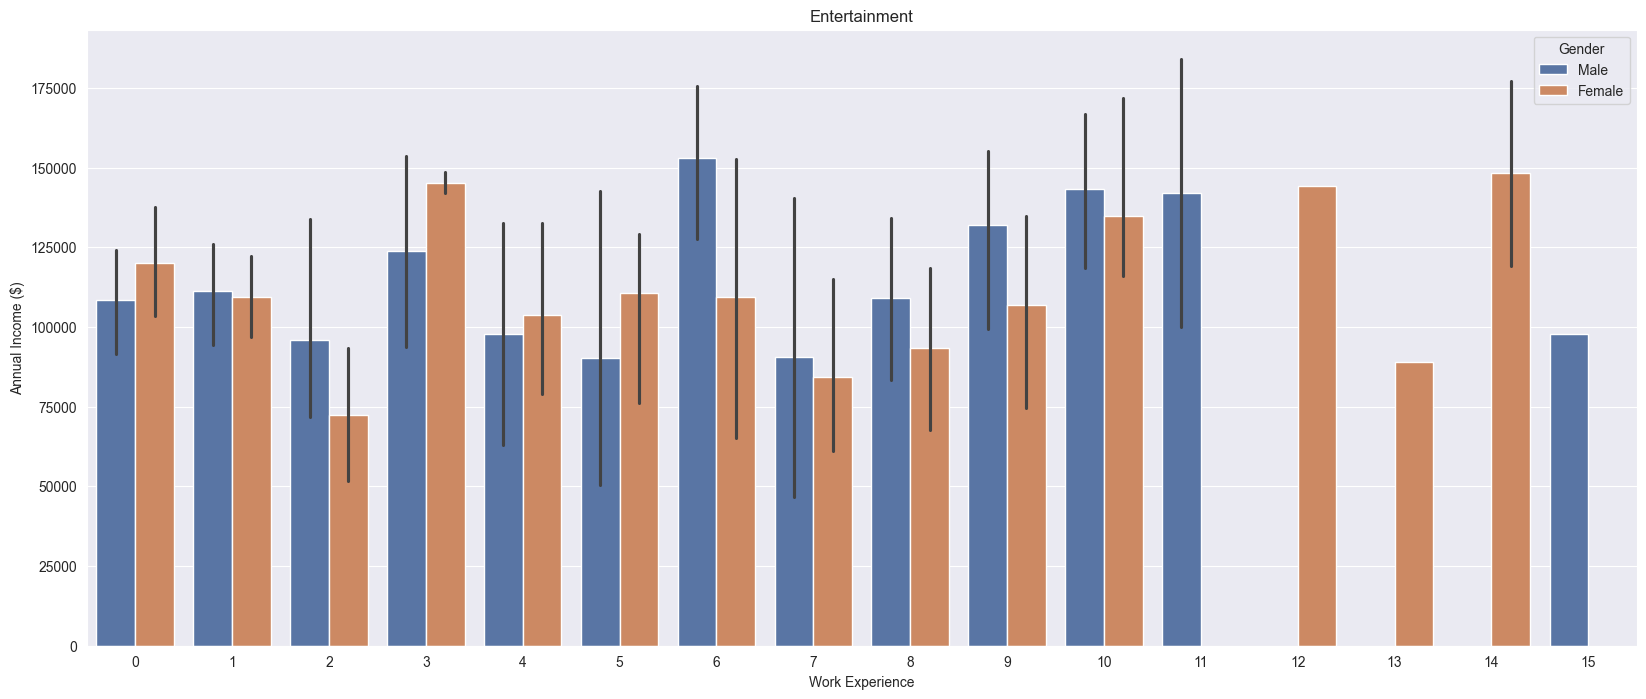

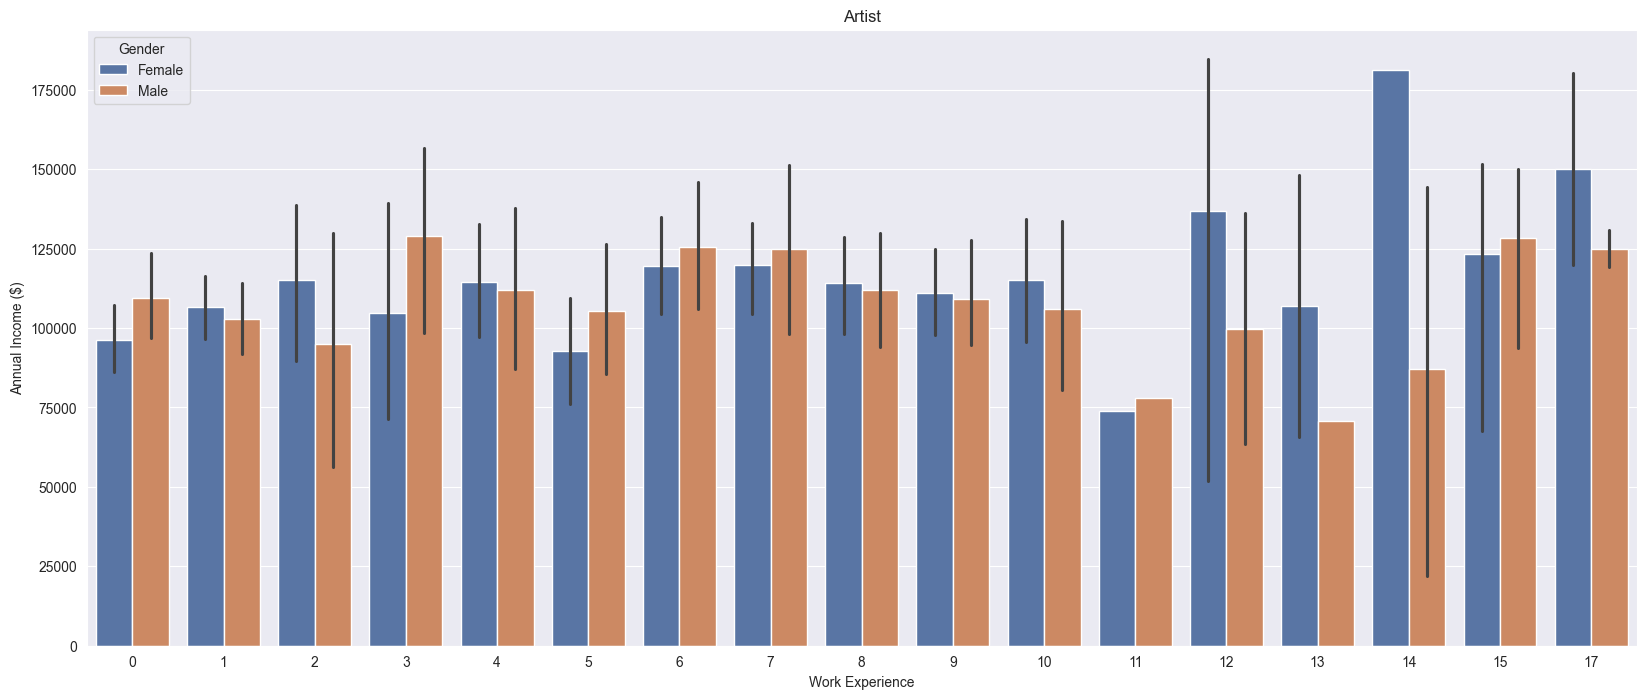

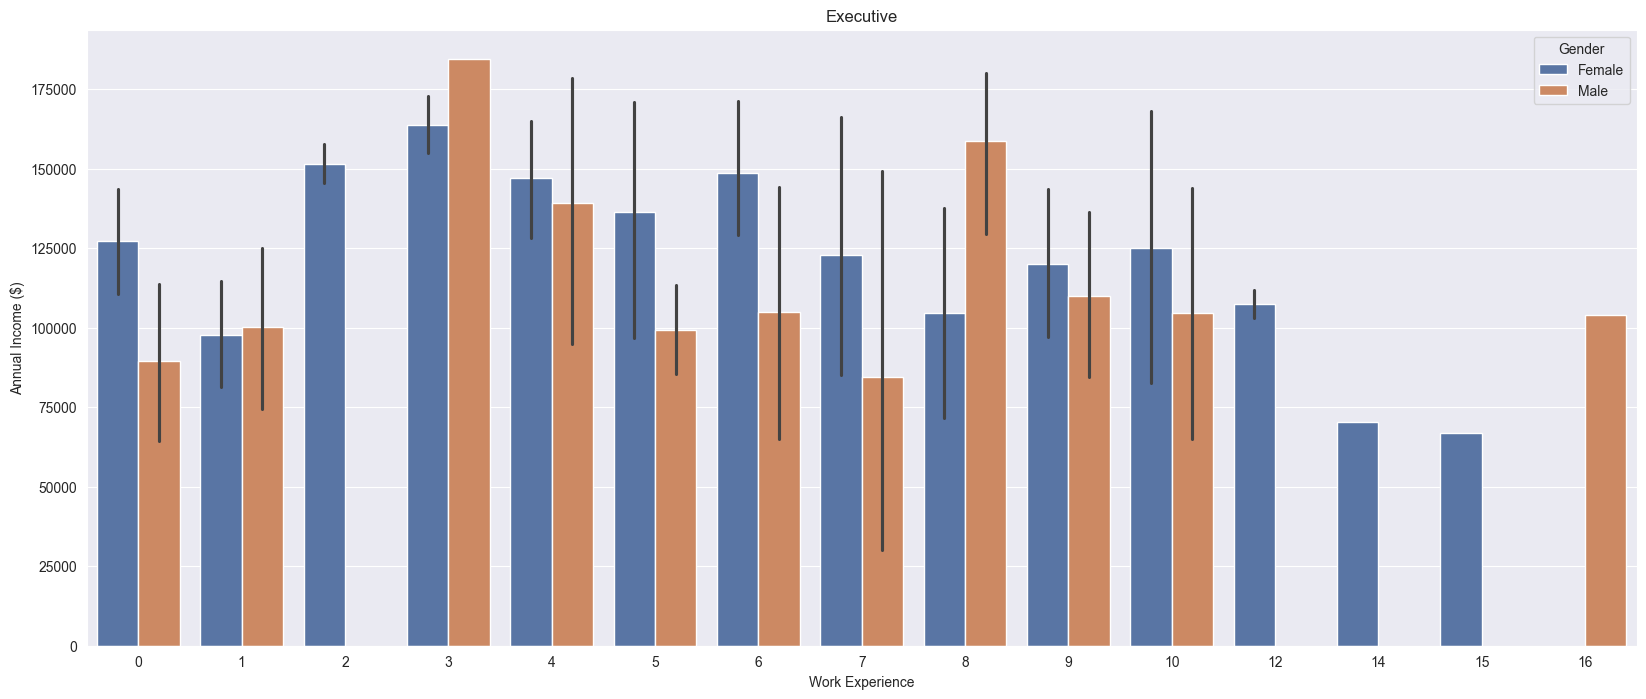

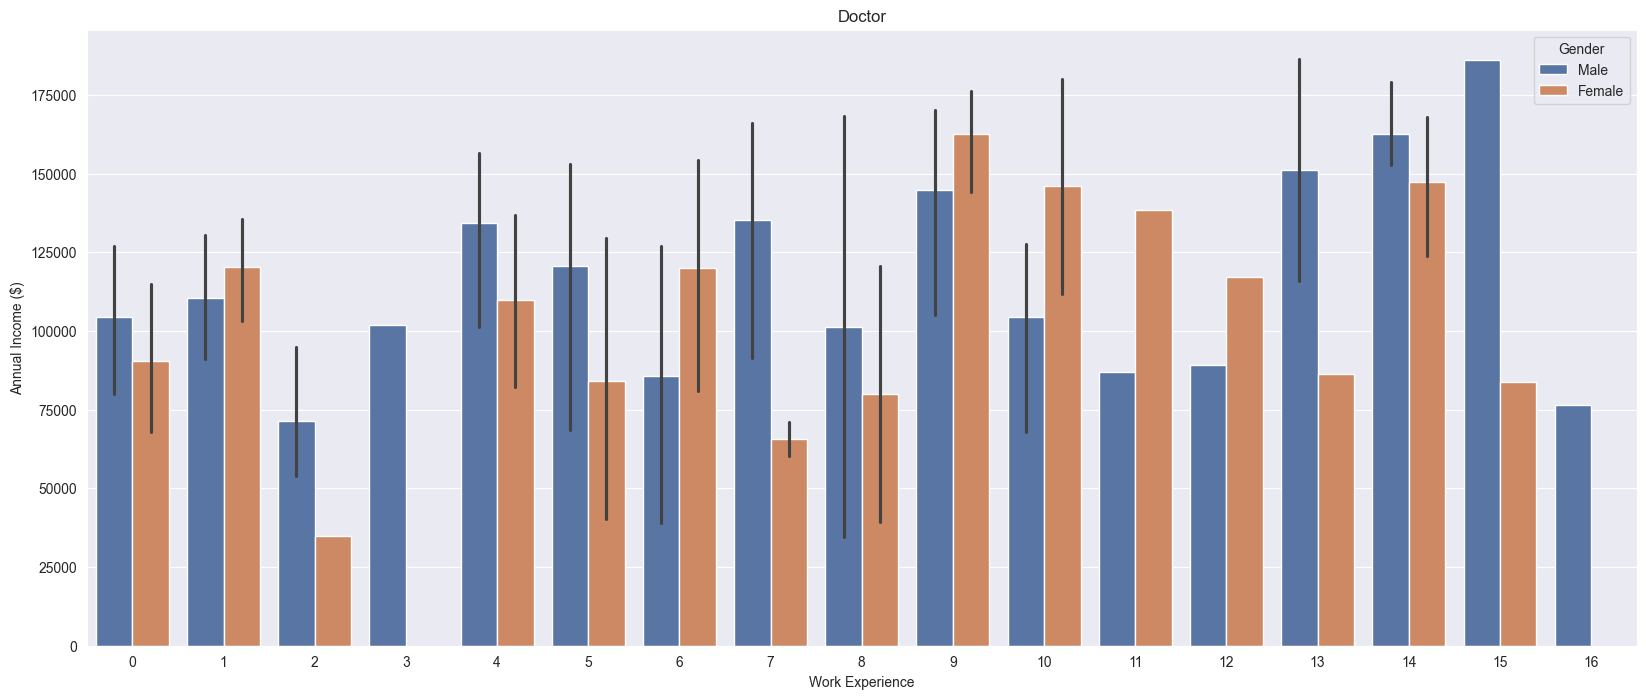

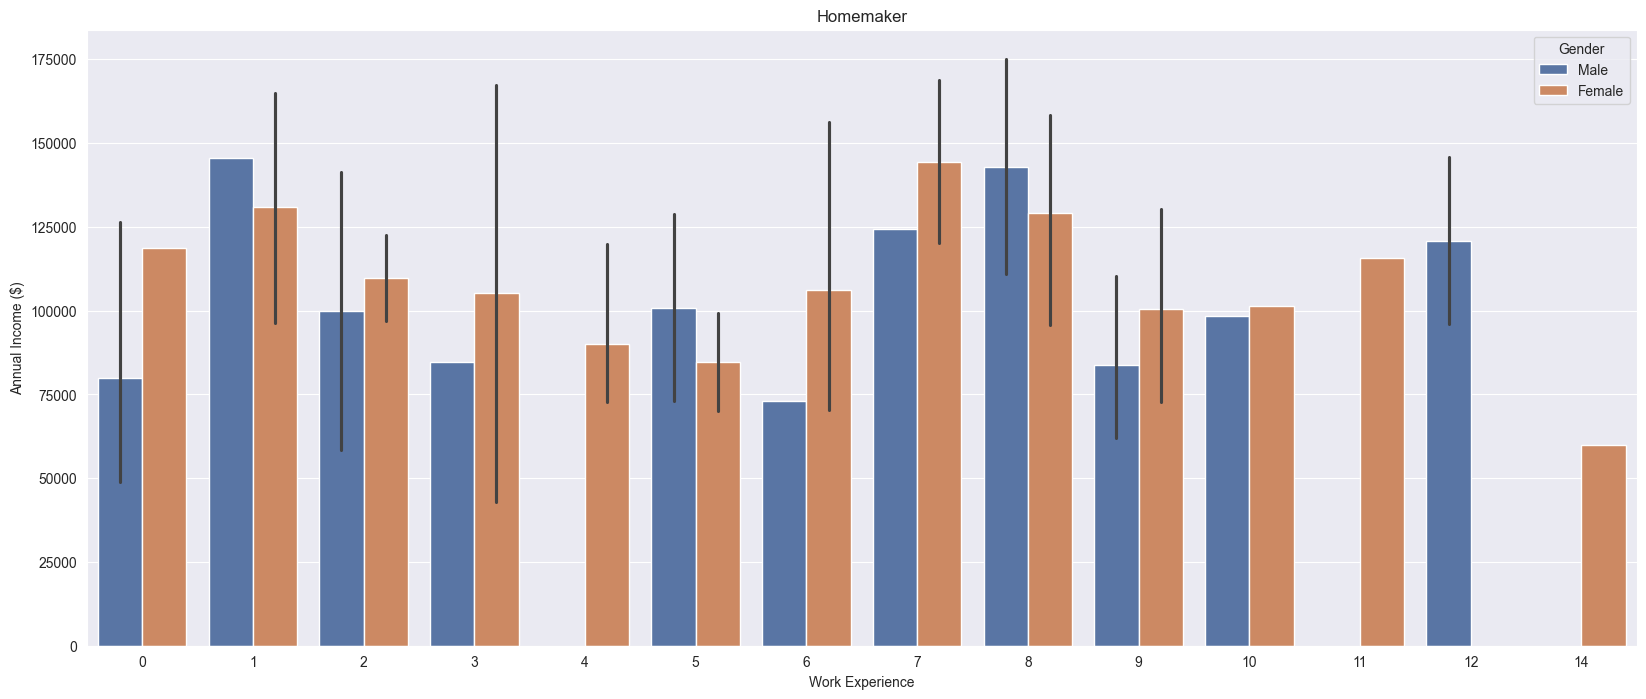

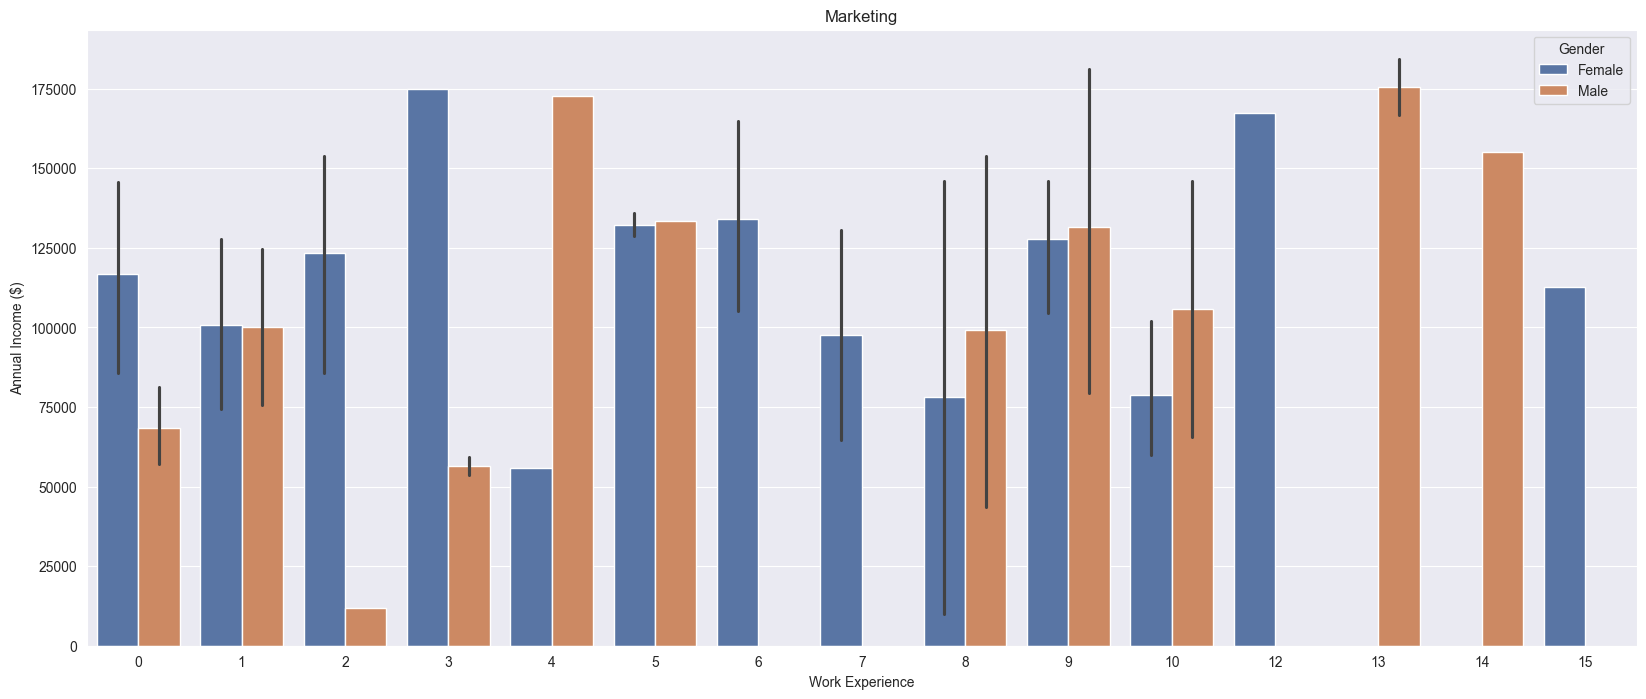

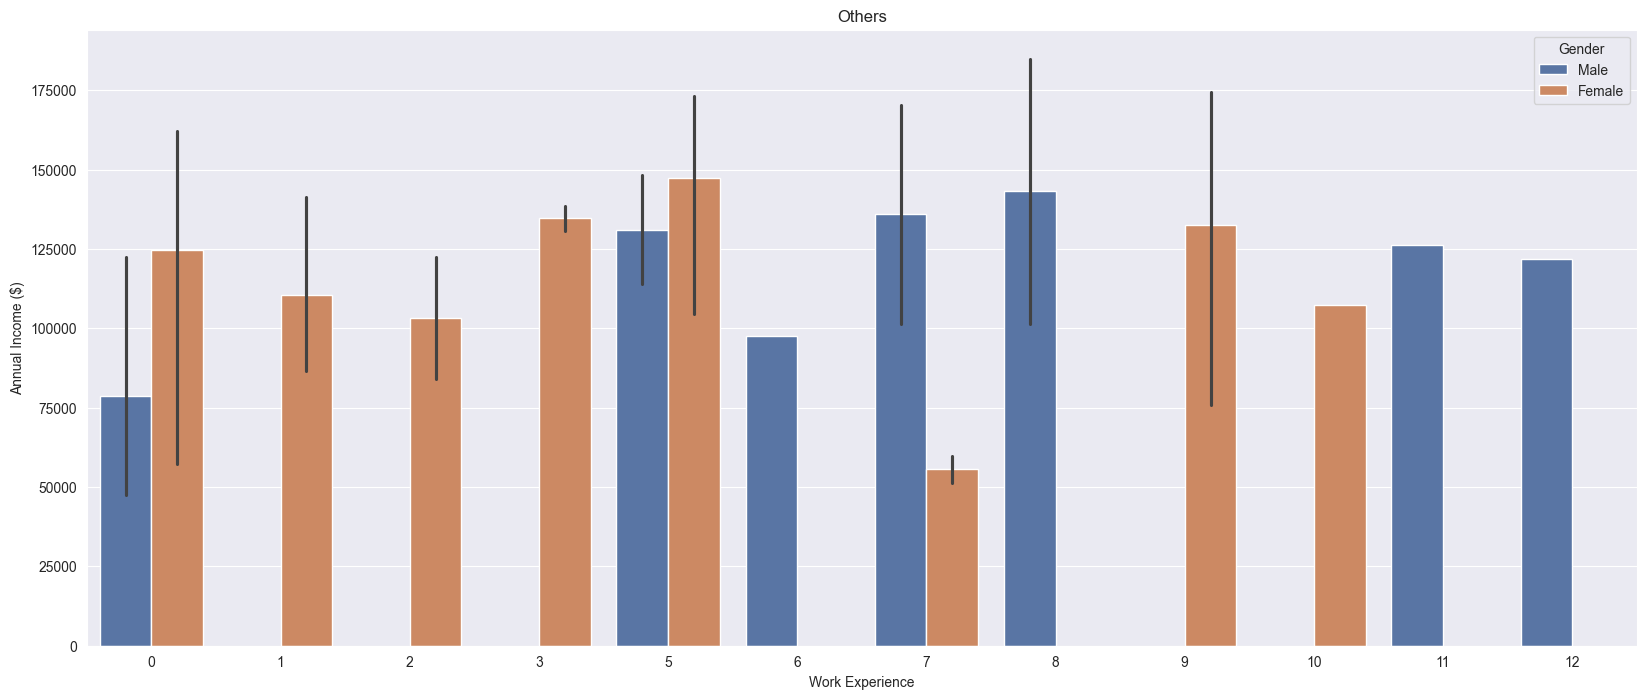

In [180]:
#vemos en el grafico superior que es marketing en donde observamos la mayor diferencia - trataremos de ver a que se debe esto 

profesiones = df['Profession'].unique()
for i in profesiones:
    mkt_df = df[df['Profession']==i]
    plt.figure(figsize=(20,8))
    sns.barplot(data=mkt_df,x='Work Experience',y='Annual Income ($)',hue='Gender')
    plt.title(i)

In [136]:
#podemos mecnioar de la visualizcion que cuando se tiene pcos años de experiencia (menores a 4 años) el salario de las mujres
#esta por encima que los varoen
#sin embargo a medida que vemos que crecen los años de experiencua el salario de los hombres s e incrementa comparado con el de las mujres

#esto hablando solamente de los pertencientes a Marketing

In [ ]:
#de donde podemos concluir que 


#si observamoss la primera comparacion de los salrios con respecto a los genros no se presentara una siferencia significativa

#sin embargo si detallamos carrera a carrera, observamos q la diferencia empieza a ser mas notoria aunque en poca medida
#ademas los departamentos que presenta mayor diferencia de retibucion anual es marketing y eecutive

#ahora veremos si los años de expericnia en cada carrera influyen en la diferencia de esta distribucion de ingresos
#y como observamos en la mayoria de professiones eiste una diferencia cuano comparamos los ingreos por genero segun años de experiencia
#siendo mas marcada esta diferencia en marketing y executive